### Name:G REVANTH
REG NO:21BAI1588

# Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

##Data Preprocessing for Titanic Dataset

    1. Import the Libraries.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


    2. Importing the dataset.

In [91]:
data = pd.read_csv("/content/gdrive/MyDrive/Applied Data Science/Data sets/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.shape

(891, 12)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
data.corr()

<ipython-input-50-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [106]:
corr=data.corr()
corr

<ipython-input-106-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.044657,-0.057527,-0.001652,0.002589
Survived,-0.005007,1.000000,-0.338481,-0.054140,-0.035322,0.081629,0.190926
Pclass,-0.035144,-0.338481,1.000000,-0.364579,0.083081,0.018443,-0.433904
Age,0.044657,-0.054140,-0.364579,1.000000,-0.307264,-0.187281,0.051976
SibSp,-0.057527,-0.035322,0.083081,-0.307264,1.000000,0.414838,0.262825
Parch,-0.001652,0.081629,0.018443,-0.187281,0.414838,1.000000,0.293337
Fare,0.002589,0.190926,-0.433904,0.051976,0.262825,0.293337,1.000000


<Axes: >

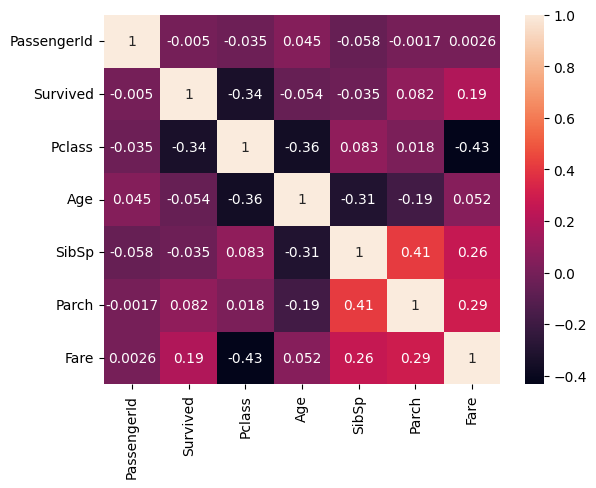

In [107]:

sns.heatmap(corr,annot=True)

In [108]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [110]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [112]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [113]:
data.Fare.value_counts()

14.4542    123
8.0500      43
13.0000     42
7.8958      38
7.7500      34
          ... 
6.8583       1
34.6542      1
12.6500      1
12.0000      1
10.5167      1
Name: Fare, Length: 203, dtype: int64

    3. Checking for Null Values and Handling Null values

In [51]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)


In [54]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Null Values have been handled

    4. Data Visualization

<Axes: xlabel='Age', ylabel='Survived'>

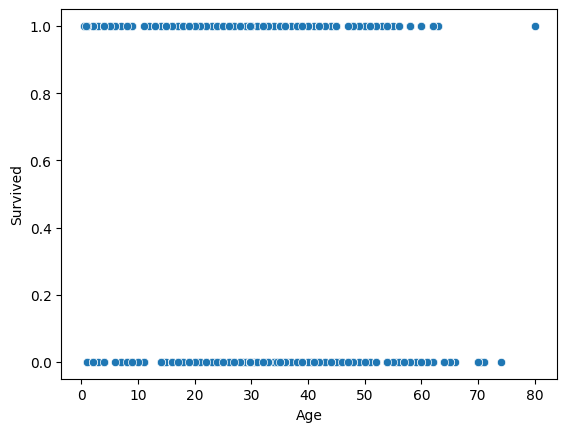

In [55]:
sns.scatterplot(x=data["Age"],y=data["Survived"])

<Axes: xlabel='Fare', ylabel='Survived'>

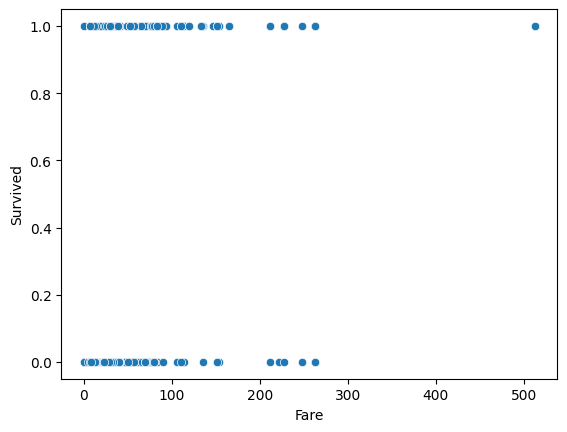

In [56]:
sns.scatterplot(x=data["Fare"],y=data["Survived"])

Text(0.5, 1.0, 'Scatter Plot of Age vs. Fare')

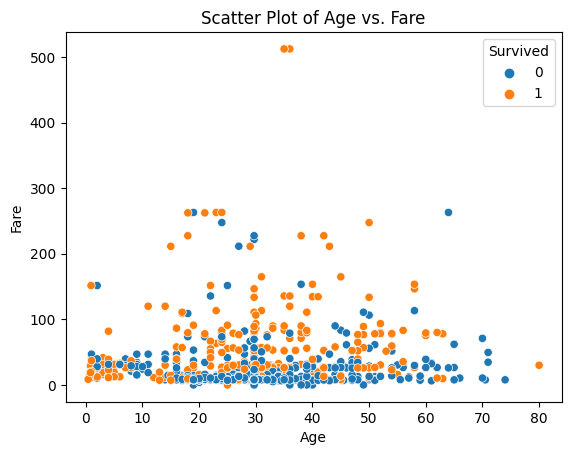

In [58]:

sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived')
plt.title('Scatter Plot of Age vs. Fare')


<Axes: >

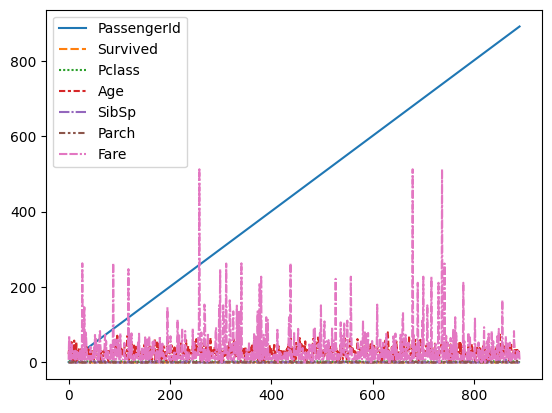

In [59]:
sns.lineplot(data=data)

<Axes: xlabel='Age', ylabel='Fare'>

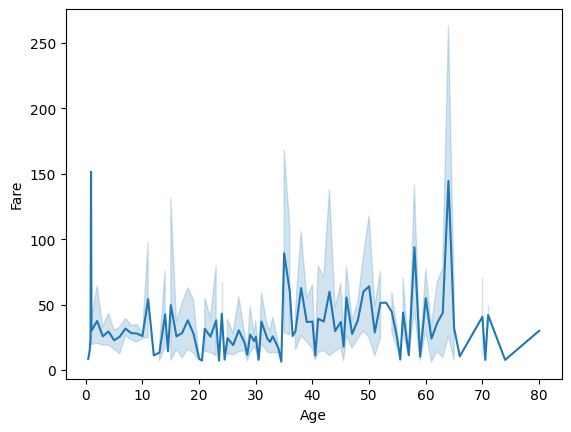

In [60]:
sns.lineplot(x="Age",y="Fare",data=data)

<ipython-input-61-753be4b086ca>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Age",y="Fare",data=data,ci=None) #confidence Interval =0


<Axes: xlabel='Age', ylabel='Fare'>

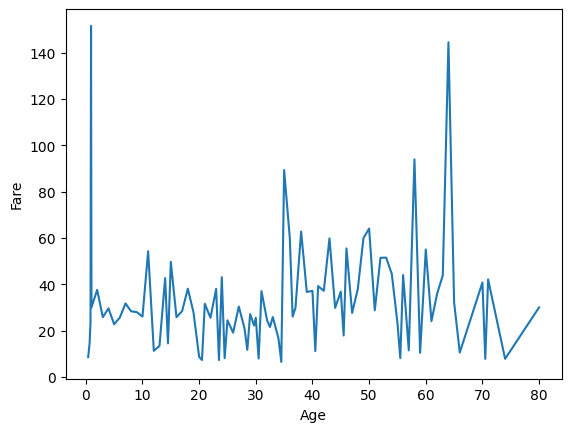

In [61]:
sns.lineplot(x="Age",y="Fare",data=data,ci=None) #confidence Interval =0

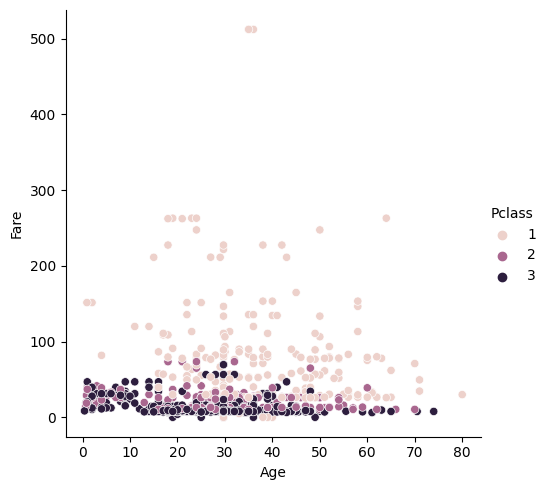

In [62]:
sns.relplot(x='Age', y='Fare', data=data, hue='Pclass')


    5. Outlier Detection

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

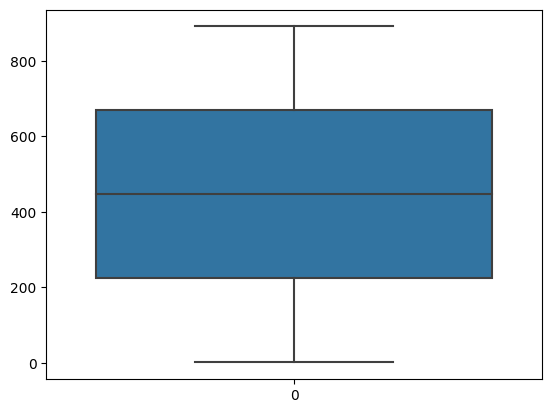

In [93]:
sns.boxplot(data.PassengerId)

<Axes: >

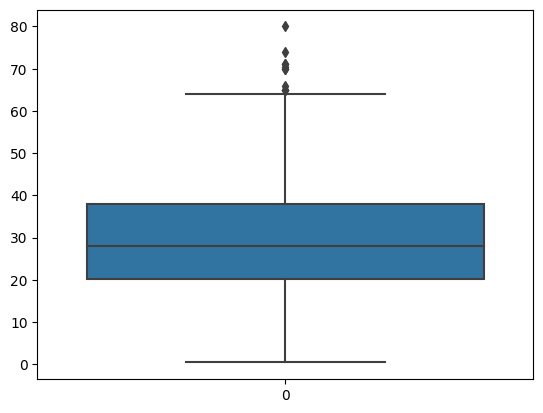

In [94]:
sns.boxplot(data.Age)

In [95]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)


20.125 38.0 17.875 -6.6875 64.8125


In [96]:
data.median()

<ipython-input-96-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [97]:

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data['Age'] = np.where((data['Age'] < lower_bound) | (data['Age'] > upper_bound), data['Age'].median(), data['Age'])


<Axes: >

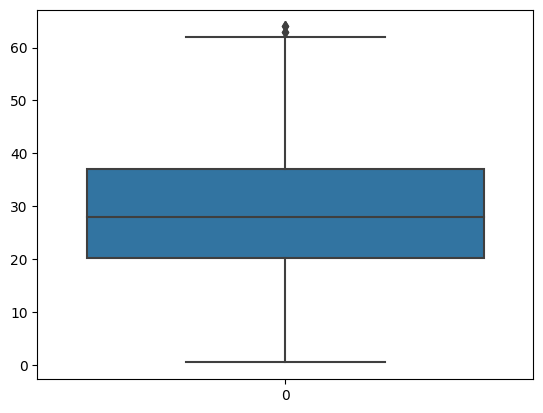

In [98]:
sns.boxplot(data.Age)

In [99]:
data.shape

(891, 12)

<Axes: >

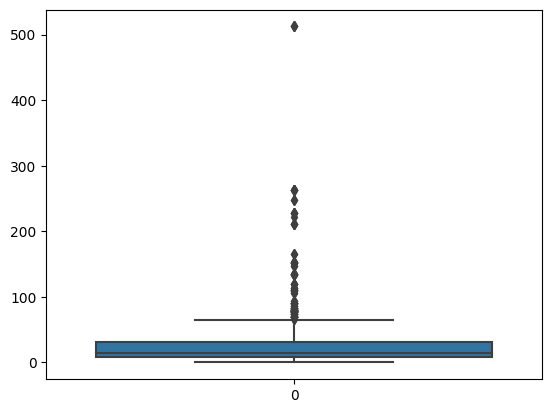

In [100]:
sns.boxplot(data.Fare)

In [101]:
from scipy import stats

In [102]:
fare_zscore = stats.zscore(data.Fare)
fare_zscore

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare, Length: 891, dtype: float64

In [103]:
data_z = data[np.abs(fare_zscore)<=3]

In [104]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data['Fare'] = np.where((data['Fare'] < lower_bound) | (data['Fare'] > upper_bound), data['Fare'].median(), data['Fare'])

<Axes: >

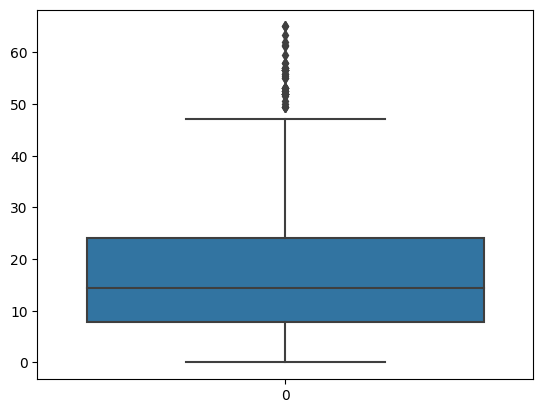

In [105]:
sns.boxplot(data.Fare)

    6. Splitting Dependent and independent variables

In [114]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [115]:

X = data.drop('Survived', axis=1)  # Independent variables
y = data['Survived']  # Dependent variable


In [116]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [118]:
X.shape

(891, 11)

In [119]:
y.shape

(891,)

In [121]:
data.shape

(891, 12)

    6. Encoding

In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [125]:
X["Sex"]=le.fit_transform(X["Sex"])

In [127]:
print(le.classes_)

['female' 'male']


In [128]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,14.4542,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [129]:
X.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

    7. Feature Scaling

In [131]:
#mean=0 and sd=1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


    8. Splitting data into Training and testing set

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [ ]:
#we split data to 80-20 train and test size